In [65]:
import pandas as pd
df = pd.read_csv('used_car_dataset.csv')
print(df.head)

<bound method NDFrame.head of               Brand      model  Year  Age     kmDriven Transmission   Owner  \
0             Honda       City  2001   23    98,000 km       Manual  second   
1            Toyota     Innova  2009   15  190000.0 km       Manual  second   
2        Volkswagen  VentoTest  2010   14    77,246 km       Manual   first   
3     Maruti Suzuki      Swift  2017    7    83,500 km       Manual  second   
4     Maruti Suzuki     Baleno  2019    5    45,000 km    Automatic   first   
...             ...        ...   ...  ...          ...          ...     ...   
9577          Skoda    Octavia  2014   10   105,904 km    Automatic  second   
9578  Maruti Suzuki   Alto-800  2020    4    55,000 km       Manual   first   
9579  Maruti Suzuki       Ritz  2013   11    92,000 km       Manual   first   
9580        Hyundai      Verna  2019    5    72,000 km    Automatic   first   
9581        Hyundai    New i20  2021    3    83,228 km       Manual  second   

        FuelType Post

In [66]:
#checking for any missing values in columns
print(df.isnull().sum())

Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64


In [67]:
# handling missing values
#Imputing numerical columns with the mean and categorical values with the mode.
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        df[column].fillna(df[column].mean(), inplace=True) # numerical columns
    elif df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True) # categorical columns

In [68]:
#checking whether the dataset has missing values
print(df.isnull().sum())

Brand           0
model           0
Year            0
Age             0
kmDriven        0
Transmission    0
Owner           0
FuelType        0
PostedDate      0
AdditionInfo    0
AskPrice        0
dtype: int64


In [69]:
#checking for any duplicated rows
print(df.duplicated().sum())

724


In [70]:
#removing the duplicated rows
df = df.drop_duplicates()

In [71]:
#checking for any duplicates again
print(df.duplicated().sum())


0


In [22]:
print(df.head)

<bound method NDFrame.head of               Brand      model  Year  Age  kmDriven Transmission   Owner  \
0             Honda       City  2001   23   98000.0       Manual  second   
1            Toyota     Innova  2009   15  190000.0       Manual  second   
2        Volkswagen  VentoTest  2010   14   77246.0       Manual   first   
3     Maruti Suzuki      Swift  2017    7   83500.0       Manual  second   
4     Maruti Suzuki     Baleno  2019    5   45000.0    Automatic   first   
...             ...        ...   ...  ...       ...          ...     ...   
9577          Skoda    Octavia  2014   10  105904.0    Automatic  second   
9578  Maruti Suzuki   Alto-800  2020    4   55000.0       Manual   first   
9579  Maruti Suzuki       Ritz  2013   11   92000.0       Manual   first   
9580        Hyundai      Verna  2019    5   72000.0    Automatic   first   
9581        Hyundai    New i20  2021    3   83228.0       Manual  second   

        FuelType PostedDate  \
0         Petrol     Nov-2

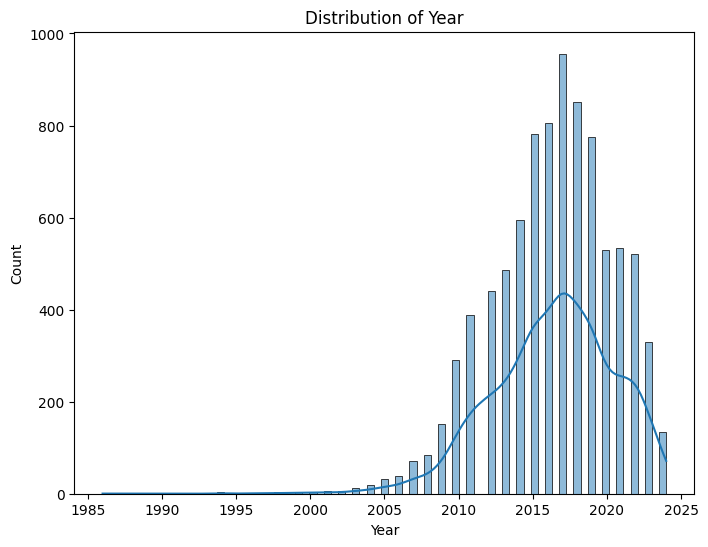

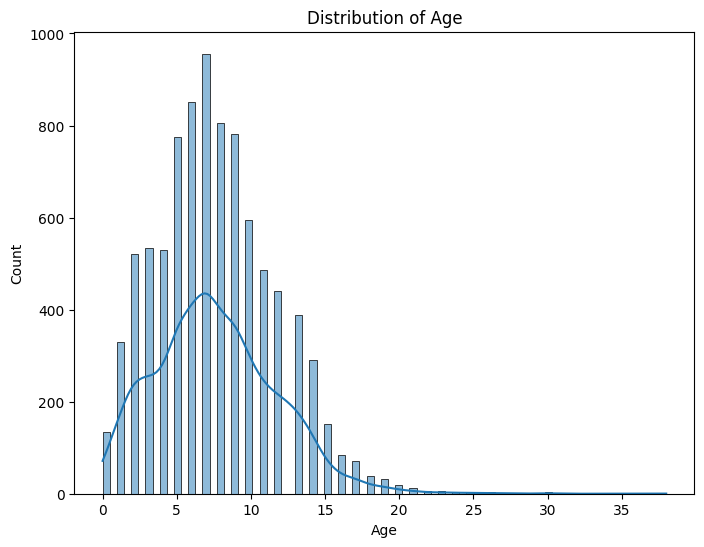

In [25]:
#Performing Exploratory Data Analysis (EDA) to Understand Patterns and Distributions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Numerical feature distributions
numerical_columns = df.select_dtypes(include=np.number).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


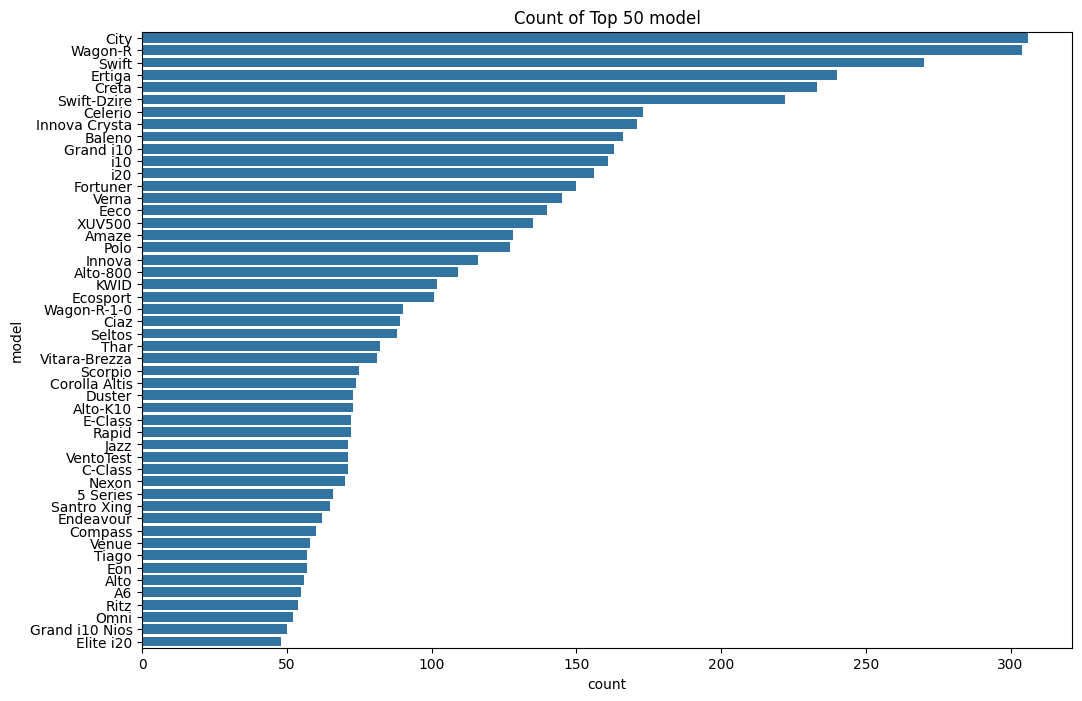

In [40]:
# Categorical feature counts

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_categorical_counts(df, column, top_n=50, figsize=(12, 8)):
    
    # Get the top N categories
    top_categories = df[column].value_counts().nlargest(top_n).index
    df_top = df[df[column].isin(top_categories)]

    # Create the count plot
    plt.figure(figsize=figsize)
    sns.countplot(y=column, data=df_top, order=df_top[column].value_counts().index)
    plt.title(f'Count of Top {top_n} {column}')
    plt.show()

# top 50 models to avoid clustering
plot_top_categorical_counts(df, 'model')



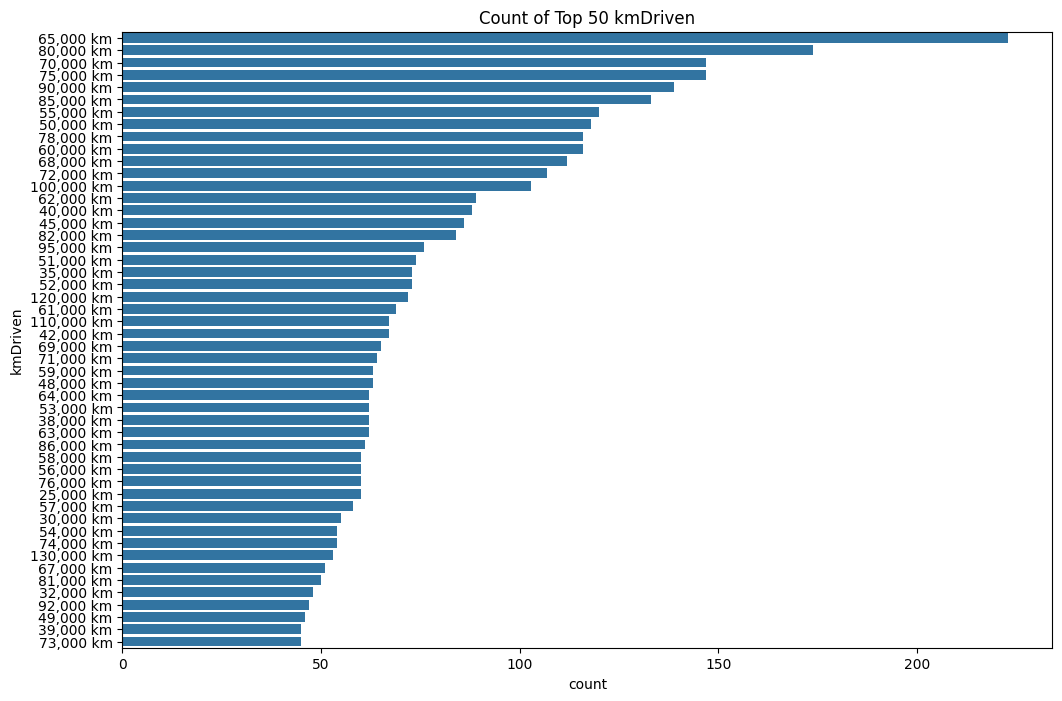

In [37]:
#kilometers Driven
plot_top_categorical_counts(df, 'kmDriven', top_n=50)

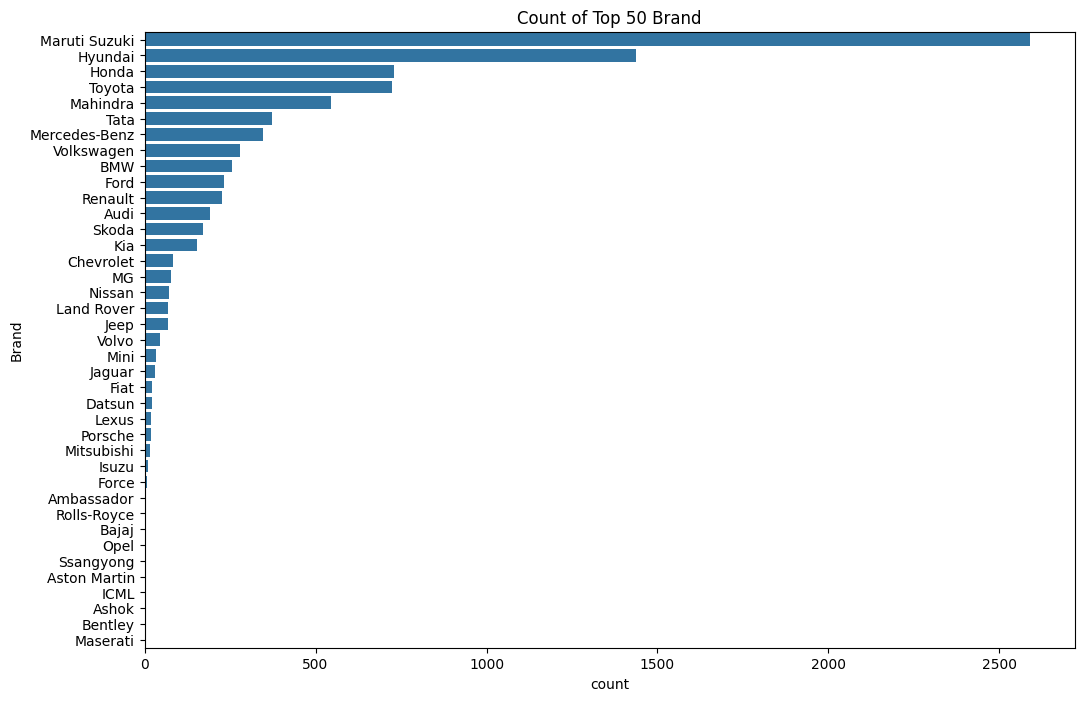

In [39]:
# Brand
plot_top_categorical_counts(df, 'Brand', top_n=50)

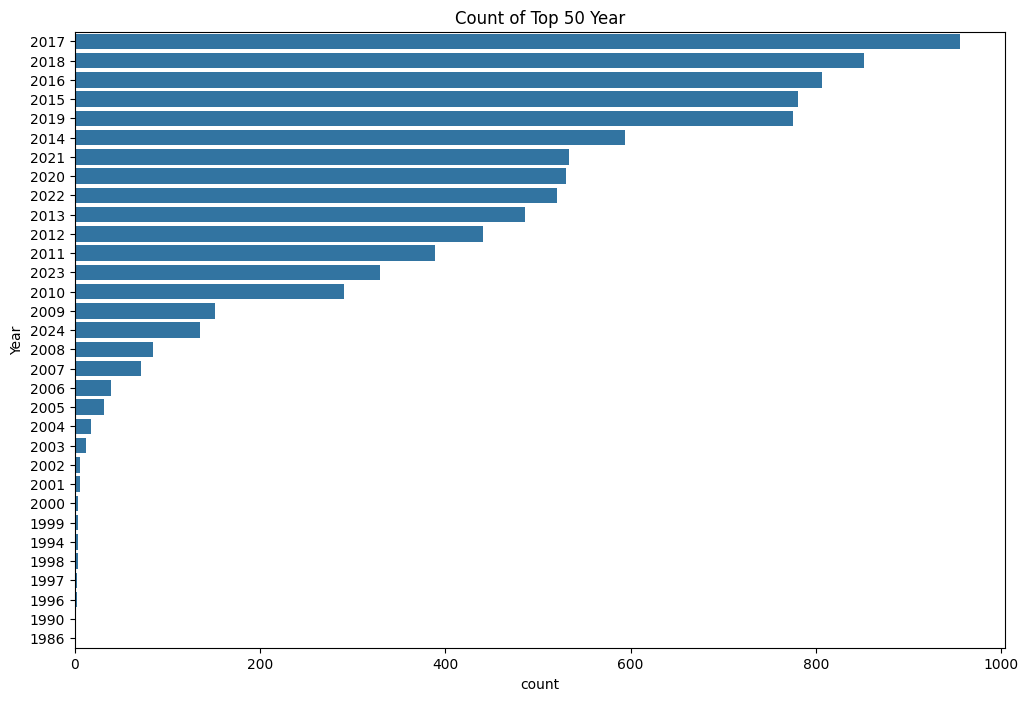

In [42]:
# year
plot_top_categorical_counts(df, 'Year', top_n=50)

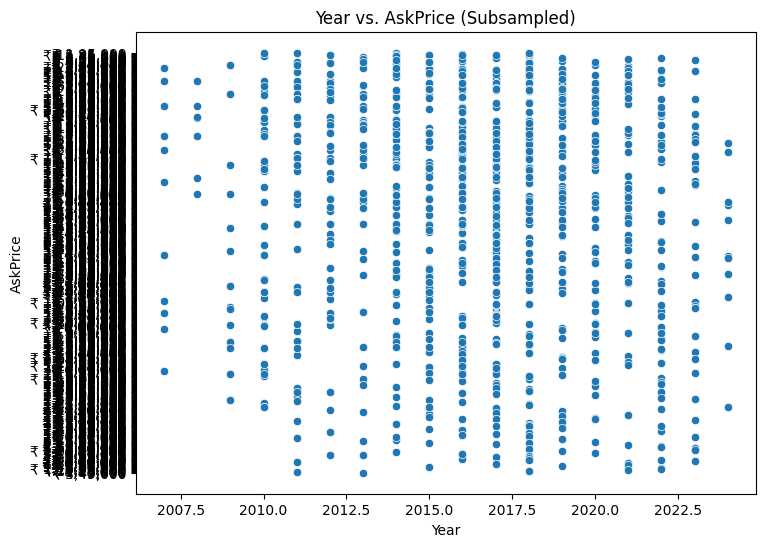

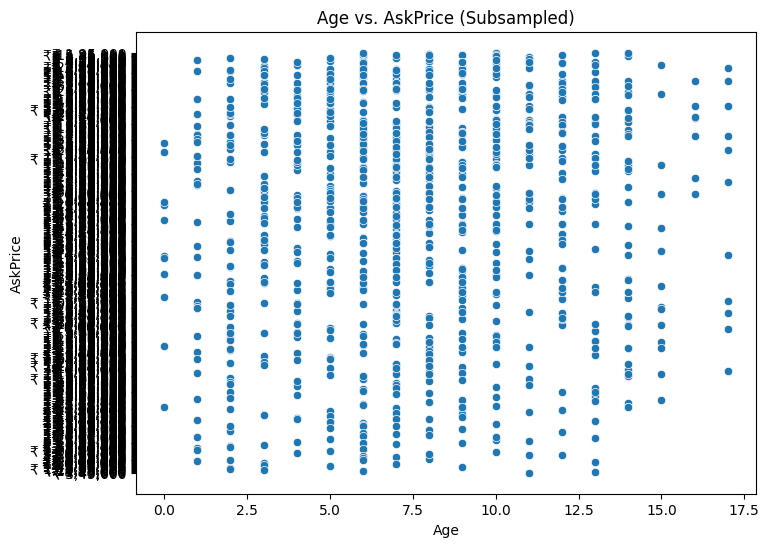

In [47]:

def plot_scatter_subsample(df, col, target_col='AskPrice', sample_size=1000, random_state=42):
    """Plots a scatter plot with a subsample of the data."""
    if len(df) > sample_size:
        df_sample = df.sample(n=sample_size, random_state=random_state)
    else:
        df_sample = df
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_sample[col], y=df_sample[target_col])
    plt.title(f'{col} vs. {target_col} (Subsampled)')
    plt.show()

if 'AskPrice' in df.columns:
    for col in numerical_columns:
        if col != 'AskPrice':
            plot_scatter_subsample(df, col)

Error: 'AskPrice' column is not a string. Check your data.
int64
1     375000
2     184999
3     565000
4     685000
5    1350000
Name: AskPrice, dtype: int64
              Brand               model  Year  Age    kmDriven Transmission  \
3331    Rolls-Royce   Phantom Series II  2015    9   11,500 km    Automatic   
962           Lexus                  LX  2024    0   24,000 km    Automatic   
331    Aston Martin            Vanquish  2016    8  25700.0 km    Automatic   
811   Mercedes-Benz             G Class  2019    5   59,000 km    Automatic   
5767  Mercedes-Benz             G Class  2019    5   59,000 km    Automatic   
...             ...                 ...   ...  ...         ...          ...   
4439     Land Rover  Range Rover Evoque  2017    7   90,000 km    Automatic   
4811           Mini   Cooper Countryman  2018    6   39,000 km    Automatic   
6767         Toyota       Innova Crysta  2021    3   35,000 km    Automatic   
7230            Kia            Carnival  2022    2 

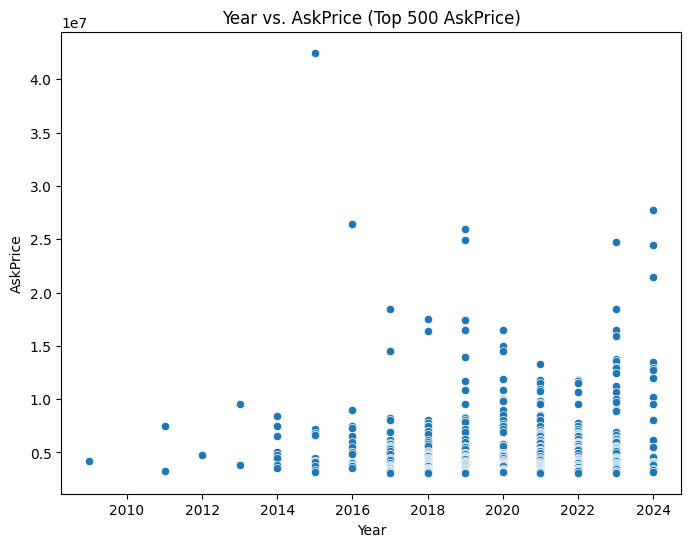

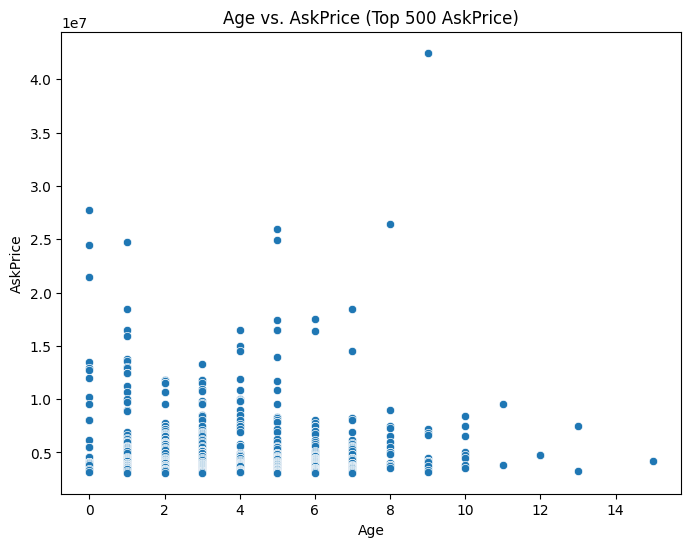

In [53]:
#the above data is clustered and untidy so i decided to use split for best visibility

# use of Try to clean and convert 'AskPrice' to numeric
try:
    df['AskPrice'] = df['AskPrice'].str.replace('[^0-9.]', '', regex=True)
    df['AskPrice'] = pd.to_numeric(df['AskPrice'], errors='coerce')
except AttributeError:
    print("Error: 'AskPrice' column is not a string. Check your data.")

# Check the data type and values
print(df['AskPrice'].dtypes)
print(df['AskPrice'].head())

# Retry the nlargest operation
if pd.api.types.is_numeric_dtype(df['AskPrice']):
    top_n_askprice = df.nlargest(500, 'AskPrice')
    print(top_n_askprice)
else:
    print("Error: 'AskPrice' column is not numeric after conversion.")

def plot_scatter_top_askprice_n(df, col, n, target_col='AskPrice'):
    """Plots a scatter plot showing the top N AskPrice values."""
    top_n_askprice = df.nlargest(n, target_col)  # Get the top N rows
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=top_n_askprice[col], y=top_n_askprice[target_col])
    plt.title(f'{col} vs. {target_col} (Top {n} AskPrice)')
    plt.show()

# Example: Show the top 500 AskPrice values
if 'AskPrice' in df.columns:
    for col in numerical_columns:
        if col != 'AskPrice':
            plot_scatter_top_askprice_n(df, col, n=500)

(8725, 11)


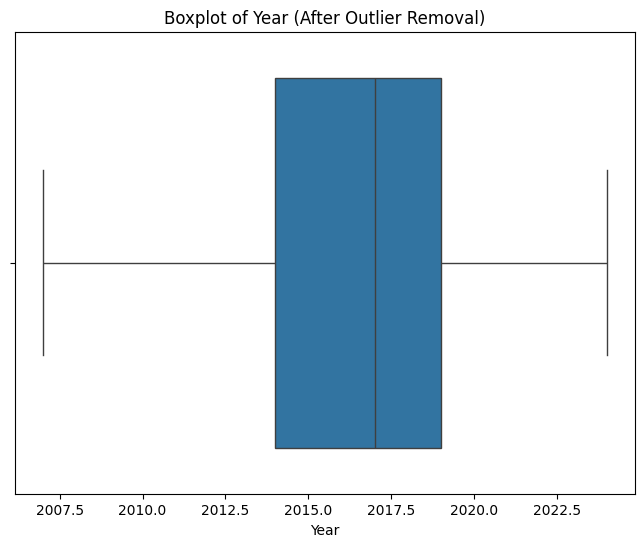

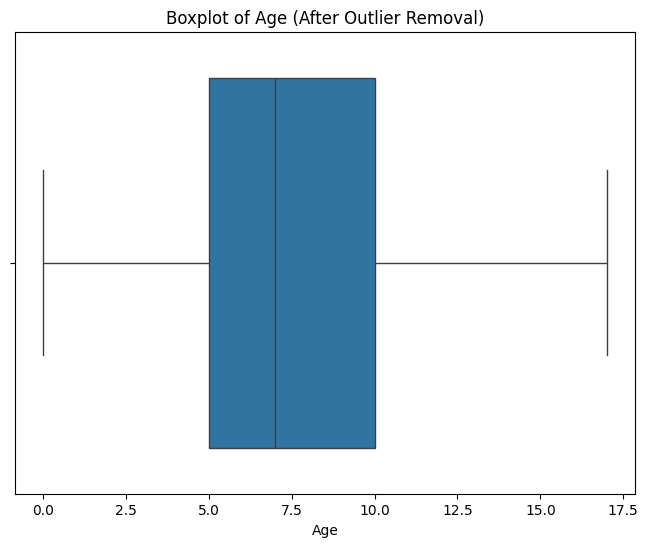

In [56]:
#Handling Outliers Using Statistical Methods
#Removing outliers using the IQR (interquartile range) method for numerical columns.
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(df.shape)

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
    plt.show()

In [76]:
#Encoding Categorical Variables


# one hot encoding
df = pd.get_dummies(df, columns = categorical_columns)

#for col in categorical_columns:
#    print(f'Unique values in {col}: {df[col].unique()}')

In [62]:
#Normalize or standardize numerical features if required.

def scale_numerical_features(df, numerical_cols, scaling_type='standardization'):
    
    if scaling_type == 'normalization':
        scaler = MinMaxScaler()
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
        print("Numerical features normalized.")
    elif scaling_type == 'standardization':
        scaler = StandardScaler()
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
        print("Numerical features standardized.")
    else:
        print("Invalid scaling type. Choose 'normalization' or 'standardization'.")

# Standardize the numerical columns
scale_numerical_features(df, numerical_cols, scaling_type='standardization')

# check the result
print(df[numerical_cols].head())
print(df[numerical_cols].describe())

Numerical features standardized.
       Year       Age
1 -1.984302  1.984302
2 -1.722336  1.722336
3  0.111422 -0.111422
4  0.635353 -0.635353
5 -0.674475  0.674475
               Year           Age
count  8.725000e+03  8.725000e+03
mean  -1.017970e-17 -1.710189e-17
std    1.000057e+00  1.000057e+00
min   -2.508233e+00 -1.945180e+00
25%   -6.744747e-01 -6.353525e-01
50%    1.114216e-01 -1.114216e-01
75%    6.353525e-01  6.744747e-01
max    1.945180e+00  2.508233e+00


(a) The key features that may contribute to prediction.
1.Year of manufacture (newer cars are usually more expensive).
2.Mileage/ kmDriven (lower mileage usually means higher price).
3.Fuel type.
4.Transmission type.
5.Brand and model.
6.Condition/ owner (first, second)

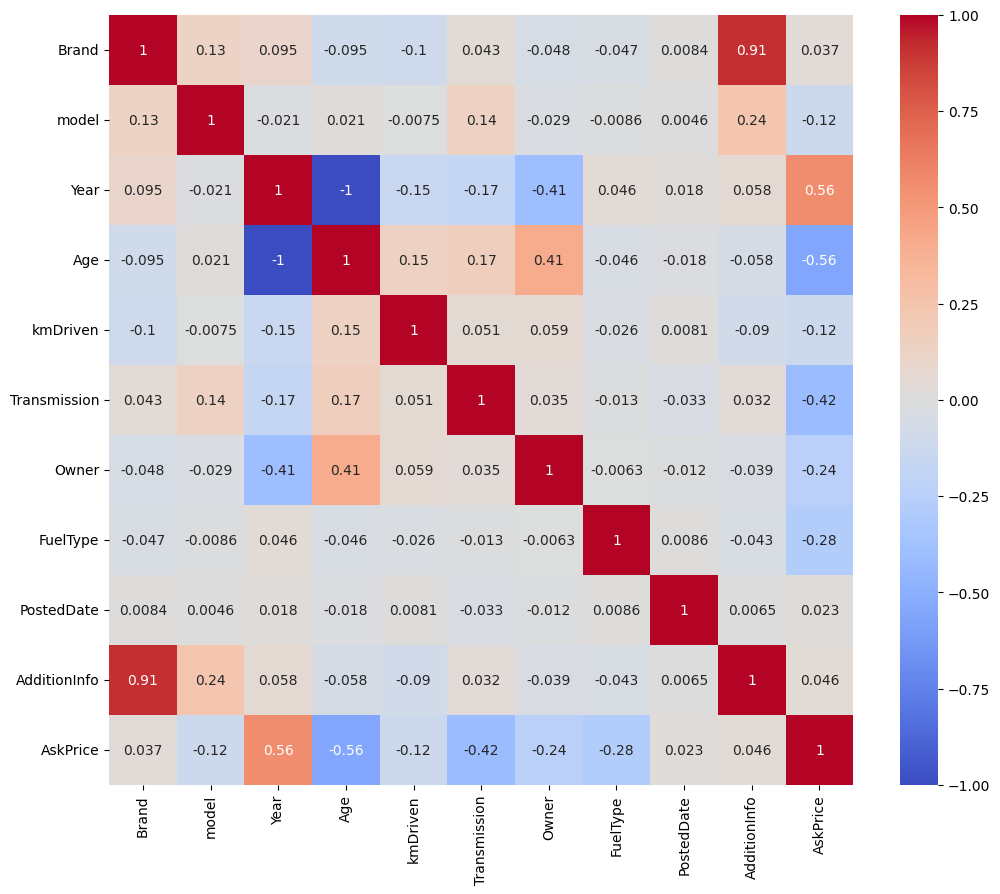

AskPrice        1.000000
Year            0.555345
AdditionInfo    0.045700
Brand           0.036961
PostedDate      0.022751
kmDriven       -0.118450
model          -0.124677
Owner          -0.239198
FuelType       -0.280818
Transmission   -0.421353
Age            -0.555345
Name: AskPrice, dtype: float64


In [64]:
#(b) Correlation Analysis

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Get correlation with 'AskPrice'
correlation_with_askprice = correlation_matrix['AskPrice'].sort_values(ascending=False)
print(correlation_with_askprice)

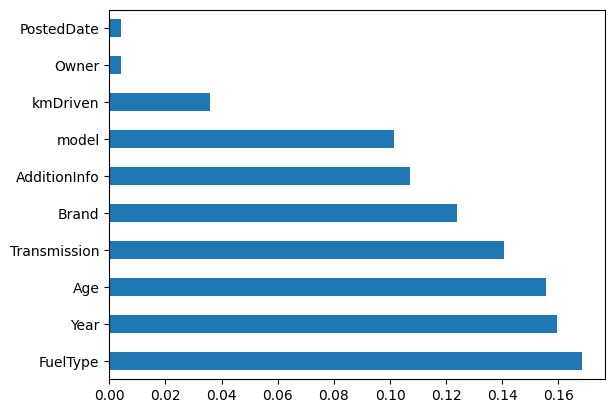

In [66]:
from sklearn.ensemble import RandomForestRegressor

  # Assuming X contains your features and y is 'AskPrice'
X = df.drop('AskPrice', axis=1)
y = df['AskPrice']

model = RandomForestRegressor()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh') # display top 10 features.
plt.show()

In [24]:
#implementing new features

# Calculating mileage per year
df['mileage_per_year'] = df['kmDriven'] / df['Age']

#Bin mileage
bins = [0, 5000, 10000, float('inf')]
labels = ['low', 'medium', 'high']
df['mileage_category'] = pd.cut(df['kmDriven'], bins=bins, labels=labels)

#Example 4: Polynomial feature.
df['km_driven_squared'] = df['kmDriven']**2;

print(df.head)

<bound method NDFrame.head of               Brand      model  Year  Age  kmDriven Transmission   Owner  \
0             Honda       City  2001   23   98000.0       Manual  second   
1            Toyota     Innova  2009   15  190000.0       Manual  second   
2        Volkswagen  VentoTest  2010   14   77246.0       Manual   first   
3     Maruti Suzuki      Swift  2017    7   83500.0       Manual  second   
4     Maruti Suzuki     Baleno  2019    5   45000.0    Automatic   first   
...             ...        ...   ...  ...       ...          ...     ...   
9577          Skoda    Octavia  2014   10  105904.0    Automatic  second   
9578  Maruti Suzuki   Alto-800  2020    4   55000.0       Manual   first   
9579  Maruti Suzuki       Ritz  2013   11   92000.0       Manual   first   
9580        Hyundai      Verna  2019    5   72000.0    Automatic   first   
9581        Hyundai    New i20  2021    3   83228.0       Manual  second   

        FuelType PostedDate  \
0         Petrol     Nov-2

In [6]:
#splitting the dataset 80/20

from sklearn.model_selection import train_test_split

X = df.drop('AskPrice', axis=1)  # Features
y = df['AskPrice']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80/20 split


In [28]:
#Train at least three different models (e.g., Logistic Regression, Decision Tree, Random Forest, XGBoost, etc.).
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#DataFrame is'df'

# Handle non-string values
if df['kmDriven'].dtype == 'object':
    # Convert to string and then replace
    df['kmDriven'] = df['kmDriven'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)
else:
    # Convert to numeric directly
    df['kmDriven'] = pd.to_numeric(df['kmDriven'], errors='coerce')  # 'coerce' will turn invalid parsing into NaN

if df['AskPrice'].dtype == 'object':
    df['AskPrice'] = df['AskPrice'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)
else:
    df['AskPrice'] = pd.to_numeric(df['AskPrice'], errors='coerce')

#  Select numerical columns
numerical_cols = ['Year', 'Age', 'kmDriven', 'AskPrice']
df_numerical = df[numerical_cols].copy()

#  Split the data
X = df_numerical.drop('AskPrice', axis=1)
y = df_numerical['AskPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, R2: {r2}')

Linear Regression - MSE: 2177685240521.2021, R2: 0.12147533610038086
Decision Tree - MSE: 2972203278103.809, R2: -0.1990501828962885
Random Forest - MSE: 2390700417406.362, R2: 0.035540471319939204


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, uniform

# Assuming X_train, y_train, X_test, y_test are defined

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter distribution
param_distributions = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the search object
random_search.fit(X_train, y_train)

# Get the best model and parameters
best_rf_model_random = random_search.best_estimator_
best_params_random = random_search.best_params_

print("Best Parameters (RandomizedSearchCV):", best_params_random)

# Evaluate the best model
y_pred_random = best_rf_model_random.predict(X_test)
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
print(f'Random Forest (RandomizedSearchCV) - MSE: {mse_random}, R2: {r2_random}')

Best Parameters (RandomizedSearchCV): {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 179}
Random Forest (RandomizedSearchCV) - MSE: 2097714743282.4705, R2: 0.1537371400109071


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, y_train, X_test, y_test are defined

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the search object
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_rf_model_grid = grid_search.best_estimator_
best_params_grid = grid_search.best_params_

print("Best Parameters (GridSearchCV):", best_params_grid)

# Evaluate the best model
y_pred_grid = best_rf_model_grid.predict(X_test)
mse_grid = mean_squared_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)
print(f'Random Forest (GridSearchCV) - MSE: {mse_grid}, R2: {r2_grid}')

Best Parameters (GridSearchCV): {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest (GridSearchCV) - MSE: 2086417173420.9238, R2: 0.15829482060717281


In [39]:
# Compare the models based on metrics such as: 
#o Accuracy, Precision, Recall, and F1-score (for classification problems).
 #o RMSE, R-squared (for regression problems).
# I used RMSE AND R-Squared
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_train, y_train, X_test, y_test are defined

# Base models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate base models
print("Base Model Evaluation:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - RMSE: {rmse:.4f}, R2: {r2:.4f}')

# Evaluate tuned Random Forest models 
if 'best_rf_model_grid' in locals():
    y_pred_grid = best_rf_model_grid.predict(X_test)
    rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))
    r2_grid = r2_score(y_test, y_pred_grid)
    print(f'Random Forest (GridSearchCV) - RMSE: {rmse_grid:.4f}, R2: {r2_grid:.4f}')

if 'best_rf_model_random' in locals():
    y_pred_random = best_rf_model_random.predict(X_test)
    rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))
    r2_random = r2_score(y_test, y_pred_random)
    print(f'Random Forest (RandomizedSearchCV) - RMSE: {rmse_random:.4f}, R2: {r2_random:.4f}')

Base Model Evaluation:
Linear Regression - RMSE: 1475698.2214, R2: 0.1215
Decision Tree - RMSE: 1724007.9113, R2: -0.1991
Random Forest - RMSE: 1546188.9980, R2: 0.0355
Random Forest (GridSearchCV) - RMSE: 1444443.5515, R2: 0.1583
Random Forest (RandomizedSearchCV) - RMSE: 1448348.9715, R2: 0.1537


In [ ]:
##note: the above randomized searchCV  is taking too long to load

RMSE: Lower RMSE values indicate better model performance.

R-squared: Higher R-squared values indicate a better fit to the data.

*** did not add cross validation here, as it was done in the hyperparameter tuning phase. 

***Also I did not do confusion matrix as I am dealing with a regression problem (predicting car prices), so we focus on metrics like RMSE (Root Mean Squared Error) and R-squared.These metrics measure how well our model predicts continuous values (car prices).

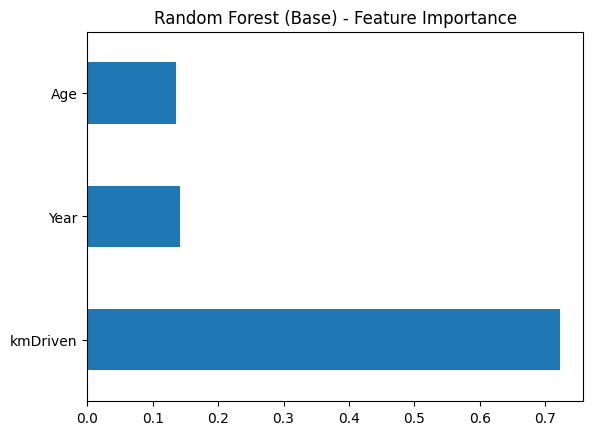

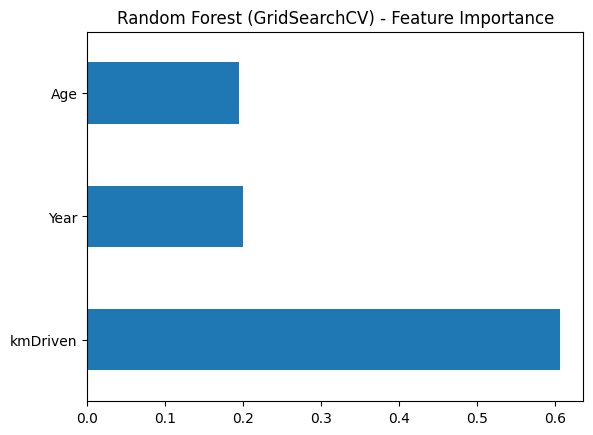

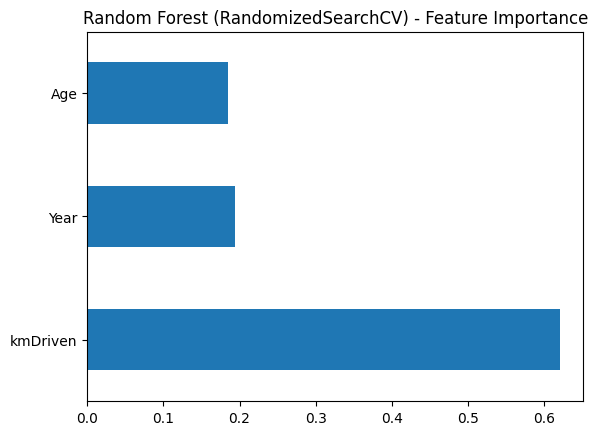

In [37]:
#Interpret Feature Importance (Tree-Based Models):
#We'll visualize the feature importance for the Random Forest models (base and tuned).

import matplotlib.pyplot as plt
import pandas as pd

def plot_feature_importance(model, feature_names, model_name):
    """Plots feature importance for a tree-based model."""
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.Series(model.feature_importances_, index=feature_names)
        feature_importance.nlargest(10).plot(kind='barh')
        plt.title(f"{model_name} - Feature Importance")
        plt.show()
    else:
        print(f"{model_name} does not have feature_importances_ attribute.")

# Plot feature importance for base Random Forest
plot_feature_importance(models['Random Forest'], X_train.columns, "Random Forest (Base)")

# Plot feature importance for tuned Random Forest models (if available)
if 'best_rf_model_grid' in locals():
    plot_feature_importance(best_rf_model_grid, X_train.columns, "Random Forest (GridSearchCV)")

if 'best_rf_model_random' in locals():
    plot_feature_importance(best_rf_model_random, X_train.columns, "Random Forest (RandomizedSearchCV)")

In [44]:
import joblib

# Assuming best_rf_model_grid is the best model
if 'best_rf_model_grid' in locals():
    best_model = best_rf_model_grid
    joblib.dump(best_model, 'used_car_price_prediction.joblib')
    print("Model saved successfully.")
else:
    print("Error: best_rf_model_grid is not defined. Please run the model training and evaluation cells.")

Model saved successfully.


In [46]:
!pip install streamlit

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.3 MB/s eta 0:00:08
   ------- -------------------------------- 1.8/9.8 MB 3.1 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.8 MB 3.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 3.8 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.8 MB 3.2 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.8 MB 3.2 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 3.3 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 3.0 MB/s eta 0:00:02
   ------------------------------ --------- 7.6/9.8 MB 3.1 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 3.4 MB/s eta 0:00:01
   ------------------------------